In [29]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, Y = mnist.data, mnist.target.astype(int)
X, Y = shuffle(X, Y, random_state=42)
X = X.to_numpy()
Y = Y.to_numpy()

In [3]:
print("shape of X : ", X.shape)
print("shape of Y : ", Y.shape)

shape of X :  (70000, 784)
shape of Y :  (70000,)


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.02, stratify=Y_train, random_state=42)

for i in range(10):
    idx = np.where(Y_val == i)[0]
    if len(idx) < 10:
        extra_samples = 10 - len(idx)
        additional_idx = np.where(Y_train == i)[0][:extra_samples]
        X_val = np.concatenate((X_val, X_train[additional_idx]), axis=0)
        Y_val = np.concatenate((Y_val, Y_train[additional_idx]), axis=0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

for i in range(10):
    print(f"Class {i}: {np.sum(Y_val == i)} samples")

Class 0: 109 samples
Class 1: 126 samples
Class 2: 112 samples
Class 3: 114 samples
Class 4: 110 samples
Class 5: 102 samples
Class 6: 111 samples
Class 7: 117 samples
Class 8: 109 samples
Class 9: 110 samples


1


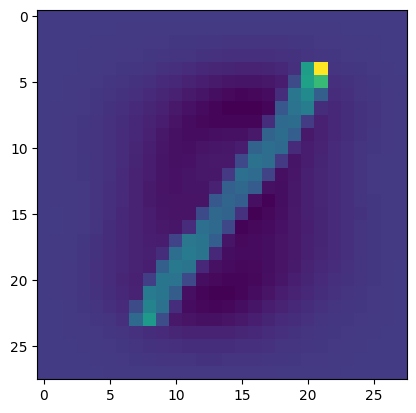

In [16]:
def show_image(image, label):
    image = image.reshape((28, 28))
    plt.imshow(image)
    print(label)
show_image(X_train[0], Y_train[0])    

# SVM

In [17]:
param_grid = {
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [0.0001, 0.001, 0.1, 1, 10]
}

# polynomial degree 2

In [18]:
poly_kernel_grid = GridSearchCV(estimator=SVC(kernel='poly'),
                     param_grid=param_grid,
                     refit=False,
                     verbose=3,
                     scoring='accuracy'
        )
poly_kernel_grid.fit(X_val, Y_val)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...............C=0.1, gamma=0.0001;, score=0.112 total time=   0.0s
[CV 2/5] END ...............C=0.1, gamma=0.0001;, score=0.116 total time=   0.0s
[CV 3/5] END ...............C=0.1, gamma=0.0001;, score=0.112 total time=   0.0s
[CV 4/5] END ...............C=0.1, gamma=0.0001;, score=0.112 total time=   0.0s
[CV 5/5] END ...............C=0.1, gamma=0.0001;, score=0.112 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.121 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.116 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.125 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.112 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.121 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.835 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.1, 1, 10]},
             refit=False, scoring='accuracy', verbose=3)

In [19]:
print("best parameters : ", poly_kernel_grid.best_params_)
print("best score : ", poly_kernel_grid.best_score_)

best parameters :  {'C': 0.1, 'gamma': 0.1}
best score :  0.8571428571428571


## linear

In [20]:
linear_kernel_grid = GridSearchCV(estimator=SVC(kernel='linear'),
                     param_grid=param_grid,
                     refit=False,
                     verbose=3,
                     scoring='accuracy'
        )
linear_kernel_grid.fit(X_val, Y_val)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...............C=0.1, gamma=0.0001;, score=0.839 total time=   0.0s
[CV 2/5] END ...............C=0.1, gamma=0.0001;, score=0.884 total time=   0.0s
[CV 3/5] END ...............C=0.1, gamma=0.0001;, score=0.839 total time=   0.0s
[CV 4/5] END ...............C=0.1, gamma=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END ...............C=0.1, gamma=0.0001;, score=0.897 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.839 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.884 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.839 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.897 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.839 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.1, 1, 10]},
             refit=False, scoring='accuracy', verbose=3)

In [21]:
print("best parameters : ", linear_kernel_grid.best_params_)
print("best score : ", linear_kernel_grid.best_score_)

best parameters :  {'C': 0.1, 'gamma': 0.0001}
best score :  0.8669642857142857


# RBF

In [23]:
rbf_kernel_grid = GridSearchCV(estimator=SVC(kernel='rbf'),
                     param_grid=param_grid,
                     refit=False,
                     verbose=3,
                     scoring='accuracy'
        )
rbf_kernel_grid.fit(X_val, Y_val)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...............C=0.1, gamma=0.0001;, score=0.112 total time=   0.1s
[CV 2/5] END ...............C=0.1, gamma=0.0001;, score=0.116 total time=   0.1s
[CV 3/5] END ...............C=0.1, gamma=0.0001;, score=0.112 total time=   0.1s
[CV 4/5] END ...............C=0.1, gamma=0.0001;, score=0.112 total time=   0.1s
[CV 5/5] END ...............C=0.1, gamma=0.0001;, score=0.112 total time=   0.1s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.594 total time=   0.1s
[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.638 total time=   0.1s
[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.634 total time=   0.1s
[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.616 total time=   0.1s
[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.679 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.112 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.1, 1, 10]},
             refit=False, scoring='accuracy', verbose=3)

In [24]:
print("best parameters : ", rbf_kernel_grid.best_params_)
print("best score : ", rbf_kernel_grid.best_score_)

best parameters :  {'C': 10, 'gamma': 0.0001}
best score :  0.8857142857142858


As we see, the rbf kernel with **C = 10** and **gamma = 0.0001** is the best classifier on this dataset.Now lets train the model:

In [25]:
svm = SVC(
    kernel='rbf',
    C=10,
    gamma=0.0001
)
svm.fit(X_train, Y_train)

SVC(C=10, gamma=0.0001)

now lets calculate training accuracy:

In [27]:
print(accuracy_score(Y_train, svm.predict(X_train)))

0.9640123906705539


and test accuracy:

In [28]:
print(accuracy_score(Y_test, svm.predict(X_test)))

0.9473571428571429


Now lets fit a logsitic regression model to compare their accuracy

In [30]:
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train, Y_train)
print(accuracy_score(Y_test, logistic_regression_model.predict(X_test)))

0.9131428571428571


In [31]:
Y_pred_lr = logistic_regression_model.predict(X_test)
Y_pred_svm = svm.predict(X_test)
misclassified_idx_lr = np.where(Y_pred_lr != Y_test)[0]
correctly_classified_idx_svm = np.where(Y_pred_svm == Y_test)[0]

shared_idx = np.intersect1d(misclassified_idx_lr, correctly_classified_idx_svm)

if len(shared_idx) > 0:
    sample_index = shared_idx[0]
    print(f"Sample index: {sample_index}")

Sample index: 19


5


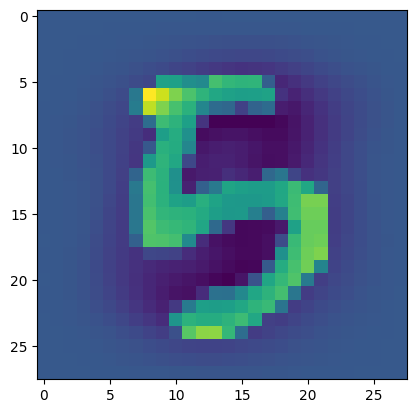

In [32]:
image = X_test[sample_index]
label = Y_test[sample_index]
show_image(image, label)